In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import string

import nltk
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
from tqdm import tqdm
import matplotlib.style as style
plt.style.use('ggplot')
from sklearn.metrics import plot_roc_curve
from numpy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [421]:
os.chdir("/home/leon/Documents/Uni/Thesis")

In [422]:
#df5 = pd.read_csv('./documents.cvs', sep = '\t')
df5 = pd.read_csv('documentsLeon.csv')

In [1]:
df5['Patnr']

NameError: name 'df5' is not defined

In [424]:
def remove_line_breaks(text):
    text = text.replace('\r', ' ').replace('\n', ' ')
    return text

#remove punctuation
def remove_punctuation(text):
    re_replacements = re.compile("__[A-Z]+__")  # such as __NAME__, __LINK__
    re_punctuation = re.compile("[%s]" % re.escape(string.punctuation))
    '''Escape all the characters in pattern except ASCII letters and numbers: word_tokenize('ebrahim^hazrati')'''
    tokens = word_tokenize(text)
    tokens_zero_punctuation = []
    for token in tokens:
        if not re_replacements.match(token):
            token = re_punctuation.sub(" ", token)
        tokens_zero_punctuation.append(token)
    return ' '.join(tokens_zero_punctuation)

def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

def lowercase(text):
    text_low = [token.lower() for token in word_tokenize(text)]
    return ' '.join(text_low)

def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text)
    text = " ".join([word for word in word_tokens if word not in stop])
    return text

#remove punctuation
def remove_punctuation(text):
    re_replacements = re.compile("__[A-Z]+__")  # such as __NAME__, __LINK__
    re_punctuation = re.compile("[%s]" % re.escape(string.punctuation))
    '''Escape all the characters in pattern except ASCII letters and numbers: word_tokenize('ebrahim^hazrati')'''
    tokens = word_tokenize(text)
    tokens_zero_punctuation = []
    for token in tokens:
        if not re_replacements.match(token):
            token = re_punctuation.sub(" ", token)
        tokens_zero_punctuation.append(token)
    return ' '.join(tokens_zero_punctuation)

#remobe one character words
def remove_one_character_words(text):
    '''Remove words from dataset that contain only 1 character'''
    text_high_use = [token for token in word_tokenize(text) if len(token)>1]      
    return ' '.join(text_high_use)   

##remove specific word list
def remove_special_words(text):
    '''Remove the User predefine useless words from the text. The list should be in the lowercase.'''
    special_words_list=['af', 'iv', 'ivm', 'mg', 'dd', 'vrijdag','afspraak','over','met', 'van', 'patient', 'dr', 'geyik','heyman','bekker','dries','om', 'sel', 'stipdonk', 'eurling', 'knackstedt'
                        'lencer','volder','schalla']# list : words
    querywords=text.split()
    textwords = [word for word in querywords if word.lower() not in special_words_list]
    text=' '.join(textwords)
    return text
    
#%%
# Stemming with 'Snowball Dutch stemmer" package
def stem(text):
    stemmer = nltk.stem.snowball.SnowballStemmer('english')
    text_stemmed = [stemmer.stem(token) for token in word_tokenize(text)]        
    return ' '.join(text_stemmed)

def lemma(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    word_tokens = nltk.word_tokenize(text)
    text_lemma = " ".join([wordnet_lemmatizer.lemmatize(word) for word in word_tokens])       
    return ' '.join(text_lemma)


#break sentences to individual word list
def sentence_word(text):
    word_tokens = nltk.word_tokenize(text)
    return word_tokens
#break paragraphs to sentence token 
def paragraph_sentence(text):
    sent_token = nltk.sent_tokenize(text)
    return sent_token    


def tokenize(text):
    """Return a list of words in a text."""
    return re.findall(r'\w+', text)

def remove_numbers(text):
    no_nums = re.sub(r'\d+', '', text)
    return ''.join(no_nums)


#%% make a text c' '.join(data['le'][6])learning function specific for pitch decks so far 
def normalization_pitchdecks(text):
    _steps = [
    remove_line_breaks,
    remove_one_character_words,
    remove_special_characters,
    lowercase,
    remove_punctuation,
    remove_stopwords,
    remove_special_words,
    stem,
    remove_numbers
]
    for step in _steps:
        text=step(text)
    return text   
#%%

In [425]:
df5['actual_outcome'] = np.where(df5['Datum van overlijden'].isna() == True , 0, 1)
df5['actual_outcome'] = pd.Categorical(df5['actual_outcome'])

In [426]:
 df5 = df5.replace(np.nan, '', regex=True) 

In [427]:
Tekst_x = []
Tekst_x_1 = []
Tekst_y = []
Tekst_y_1 = []


for i in tqdm(df5['Tekst_x']):
    Tekst_x.append(normalization_pitchdecks(i)) 
    
for i in tqdm(df5['Tekst_x.1']):
    Tekst_x_1.append(normalization_pitchdecks(i))
    
for i in tqdm(df5['Tekst_y']):
    Tekst_y.append(normalization_pitchdecks(i))
    
for i in tqdm(df5['Tekst_y.1']):
    Tekst_y_1.append(normalization_pitchdecks(i))

100%|██████████| 646/646 [00:01<00:00, 541.59it/s]


In [428]:
df5['x_clean'] = pd.Series(Tekst_x)
df5['y_clean'] = pd.Series(Tekst_y)
df5['x_1_clean'] = pd.Series(Tekst_x_1)
df5['y_1_clean'] = pd.Series(Tekst_y_1)

In [429]:
df5["full"] = df5["x_clean"] +" "+ df5["x_1_clean"] +" "+ df5['y_1_clean'] +" "+ df5['y_clean']

In [430]:
df5.head()

,Unnamed: 0,Patnr,Geslacht,Geboortejaar,Datum van overlijden,Tekst_x,Tekst_y,Tekst_x.1,Tekst_y.1,Document,Arts,clean_text,actual_outcome,x_clean,y_clean,x_1_clean,y_1_clean,full
0,0,25222576,1,1922,20/02/14,,Dyspnoe,Iom Dr. Schalla: ICC long voor overname.,"RR/ 156/74, Hf 82/min reg, Temp 38,0, Sat 90 %...",10001036886,CAR0022286,iom icc long overnam,1,,dyspno,iom icc long voor overnam,rr hf min reg temp sat o harttonen slecht t...,iom icc long voor overnam rr hf min reg temp...
1,1,25222983,2,1963,,,dyspnoe,B/iom dr. Volders \r-d-dimeer nabepalen (hoewe...,"RR 219/98 li re 210/90 , regelmatige pols v...",10019659290,CAR0021189,biom volder ddimer nabepal hoewel lag verdenk ...,0,,dyspno,biom volder ddimeer nabepalen hoewel lage verd...,rr li regelmatig pol min temp sat zonder o...,biom volder ddimeer nabepalen hoewel lage ver...
2,2,25225233,1,1942,20/10/11,,,Bumetanide en nitro iv. Dagelijks controle EL/NF.,"Algemeen: matig ziek, CVD: halsvenen tot mid. ...",10002030149,CAR0005336,bumetanid nitro iv dagelijk control elnf,1,,,bumetanid en nitro dagelijk control elnf,algemeen matig ziek cvd halsvenen tot mid kaak...,bumetanid en nitro dagelijk control elnf alge...
3,3,25226312,2,1949,,,pijn op de borst,#NAME?,Niet ziek\rCardiopulmonaal nu geen afwijkingen...,10000238023,CAR0021189,expectatief tav pob blaauw lat gan,0,,pijn op de borst,name,niet ziek cardiopulmona nu geen afwijkingen ex...,name niet ziek cardiopulmona nu geen afwijkin...
4,4,25226312,2,1949,,,,Geen tekenen van vochtretentie. Nycturie 10x m...,"gewicht: 65 kg, bloeddruk links: 143 / 76 mmHg...",10024632894,CAR0000311,teken vochtretentie nycturie 10x mevr bekend k...,0,,,geen tekenen vochtretenti nycturi x mevr beken...,gewicht kg bloeddruk link mmhg hartritm mi...,geen tekenen vochtretenti nycturi x mevr beke...


In [431]:
combined = df5.groupby(['Patnr', 'actual_outcome'])['full'].apply(lambda x: ' '.join(x.astype(str))).reset_index()

In [432]:
combined

,Patnr,actual_outcome,full
0,25200283,0,jarig dame bekend idiopatisch cardiomyopathi ...
1,25200283,1,NaN
2,25200730,0,NaN
3,25200730,1,jarig cardiaal bekend cabg teven hfpef en pr...
4,25201939,0,conclusi geen cardial verklar voor klachten g...
...,...,...,...
257,25297780,1,NaN
258,25299138,0,NaN
259,25299138,1,conclusi werkdiagnos acut dyspno hoesten bij ...
260,25299142,0,gekend hypertensi en chronisch hypertrofi api...


In [433]:
# replace the NaN's

combined = combined.replace(np.nan, 1, regex=True) 
combined = combined[combined['full'] != 1]

In [434]:
combined

,Patnr,actual_outcome,full
0,25200283,0,jarig dame bekend idiopatisch cardiomyopathi ...
3,25200730,1,jarig cardiaal bekend cabg teven hfpef en pr...
4,25201939,0,conclusi geen cardial verklar voor klachten g...
6,25201986,0,start metoprolol ret mg xd ascal cardio mg xd...
8,25202235,0,stabiel vochtstatus bij deze patint bekend een...
...,...,...,...
253,25296604,1,naar hui selokeen terug naar mg poliafspraak ...
254,25297345,0,eenmalig onwelword enkel seconden op holter g...
256,25297780,0,jarig vital ht en hypercholesterolemi de voor...
259,25299138,1,conclusi werkdiagnos acut dyspno hoesten bij ...


In [435]:
combined.loc[:,'Gender'] = pd.Series(df5.groupby(['Patnr', 'actual_outcome'])['Geslacht'].last().reset_index()['Geslacht'])
combined.loc[:,'Birthdate'] = pd.Series(df5.groupby(['Patnr', 'actual_outcome'])['Geboortejaar'].last().reset_index()['Geboortejaar'])

In [436]:
combined

,Patnr,actual_outcome,full,Gender,Birthdate
0,25200283,0,jarig dame bekend idiopatisch cardiomyopathi ...,2.0,1952.0
3,25200730,1,jarig cardiaal bekend cabg teven hfpef en pr...,1.0,1920.0
4,25201939,0,conclusi geen cardial verklar voor klachten g...,1.0,1948.0
6,25201986,0,start metoprolol ret mg xd ascal cardio mg xd...,1.0,1943.0
8,25202235,0,stabiel vochtstatus bij deze patint bekend een...,1.0,1947.0
...,...,...,...,...,...
253,25296604,1,naar hui selokeen terug naar mg poliafspraak ...,1.0,1940.0
254,25297345,0,eenmalig onwelword enkel seconden op holter g...,2.0,1930.0
256,25297780,0,jarig vital ht en hypercholesterolemi de voor...,2.0,1942.0
259,25299138,1,conclusi werkdiagnos acut dyspno hoesten bij ...,1.0,1937.0


In [437]:
combined.isna().sum()

Patnr             0
actual_outcome    0
full              0
Gender            0
Birthdate         0
dtype: int64

In [438]:
combined

,Patnr,actual_outcome,full,Gender,Birthdate
0,25200283,0,jarig dame bekend idiopatisch cardiomyopathi ...,2.0,1952.0
3,25200730,1,jarig cardiaal bekend cabg teven hfpef en pr...,1.0,1920.0
4,25201939,0,conclusi geen cardial verklar voor klachten g...,1.0,1948.0
6,25201986,0,start metoprolol ret mg xd ascal cardio mg xd...,1.0,1943.0
8,25202235,0,stabiel vochtstatus bij deze patint bekend een...,1.0,1947.0
...,...,...,...,...,...
253,25296604,1,naar hui selokeen terug naar mg poliafspraak ...,1.0,1940.0
254,25297345,0,eenmalig onwelword enkel seconden op holter g...,2.0,1930.0
256,25297780,0,jarig vital ht en hypercholesterolemi de voor...,2.0,1942.0
259,25299138,1,conclusi werkdiagnos acut dyspno hoesten bij ...,1.0,1937.0


In [439]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [440]:
processed_text = combined['full']

In [441]:
# get tfidf matrix

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(processed_text)
print(tfidf.shape)
print('\n')
#print(vectorizer.get_feature_names())

(131, 4269)




In [442]:
y = combined['actual_outcome'].values

X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(tfidf, y, test_size=0.2, random_state=42)

# Fit model

In [443]:
# run best performing model

logmodel = LogisticRegression()
logmodel.fit(X_train_tf, y_train_tf)

predictions_LR_tf = logmodel.predict(X_test_tf)

print("LR Accuracy -> ",accuracy_score(predictions_LR_tf, y_test_tf)*100)
print(classification_report(predictions_LR_tf,y_test_tf))

LR Accuracy ->  62.96296296296296
              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.69      0.60      0.64        15

    accuracy                           0.63        27
   macro avg       0.63      0.63      0.63        27
weighted avg       0.64      0.63      0.63        27



# Predict all data, not only test set

In [444]:
# predict whole dataset

predict_all = logmodel.predict(tfidf)

In [445]:
predict_all

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

### To find the indices of the predicted data points I run the train test split with same random state, but not on tfidf but on the actual text data points:

In [19]:
# processed_text = combined['full']
# y = combined['dead'].values
# 
# 
# X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(processed_text,
#                                                                 y,
#                                                                 test_size=0.2,
#                                                                 random_state=42)

In [22]:
# get indices fo train observations
#
#test_indices = X_test_tf.index
#test_indices 

In [23]:
# only choose the observations from the test set

#predicted_obs = df5.iloc[test_indices] 

In [24]:
# append the predictions to the observations

#predicted_obs.loc[:,'predicted'] = pd.Categorical(predictions_LR_tf) 

In [446]:
combined.loc[:,'predictions'] = pd.Categorical(predict_all)
combined

,Patnr,actual_outcome,full,Gender,Birthdate,predictions
0,25200283,0,jarig dame bekend idiopatisch cardiomyopathi ...,2.0,1952.0,0
3,25200730,1,jarig cardiaal bekend cabg teven hfpef en pr...,1.0,1920.0,1
4,25201939,0,conclusi geen cardial verklar voor klachten g...,1.0,1948.0,0
6,25201986,0,start metoprolol ret mg xd ascal cardio mg xd...,1.0,1943.0,0
8,25202235,0,stabiel vochtstatus bij deze patint bekend een...,1.0,1947.0,0
...,...,...,...,...,...,...
253,25296604,1,naar hui selokeen terug naar mg poliafspraak ...,1.0,1940.0,1
254,25297345,0,eenmalig onwelword enkel seconden op holter g...,2.0,1930.0,1
256,25297780,0,jarig vital ht en hypercholesterolemi de voor...,2.0,1942.0,0
259,25299138,1,conclusi werkdiagnos acut dyspno hoesten bij ...,1.0,1937.0,1


## Explore the predicted groups

## Gender

In [401]:
combined['Gender'] = ['male' if x == 1 else 'female' for x in combined['Gender']]
combined['predictions'] = ['high_risk' if x == 1 else 'low_risk' for x in combined['predictions']]
combined['actual_outcome'] = ['high_risk' if x == 1 else 'low_risk' for x in combined['actual_outcome']]

In [403]:
combined['Gender'] = pd.Categorical(combined['Gender'])
combined['actual_outcome'] = pd.Categorical(combined['actual_outcome'])
combined['Patnr'] = pd.Categorical(combined['Patnr'])
combined['predictions'] = pd.Categorical(combined['predictions'])

In [447]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 260
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Patnr           131 non-null    int64   
 1   actual_outcome  131 non-null    category
 2   full            131 non-null    object  
 3   Gender          131 non-null    float64 
 4   Birthdate       131 non-null    float64 
 5   predictions     131 non-null    category
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 5.6+ KB


In [452]:
combined

,Patnr,actual_outcome,full,Gender,Birthdate,predictions
0,25200283,0,jarig dame bekend idiopatisch cardiomyopathi ...,2.0,1952.0,0
3,25200730,1,jarig cardiaal bekend cabg teven hfpef en pr...,1.0,1920.0,1
4,25201939,0,conclusi geen cardial verklar voor klachten g...,1.0,1948.0,0
6,25201986,0,start metoprolol ret mg xd ascal cardio mg xd...,1.0,1943.0,0
8,25202235,0,stabiel vochtstatus bij deze patint bekend een...,1.0,1947.0,0
...,...,...,...,...,...,...
253,25296604,1,naar hui selokeen terug naar mg poliafspraak ...,1.0,1940.0,1
254,25297345,0,eenmalig onwelword enkel seconden op holter g...,2.0,1930.0,1
256,25297780,0,jarig vital ht en hypercholesterolemi de voor...,2.0,1942.0,0
259,25299138,1,conclusi werkdiagnos acut dyspno hoesten bij ...,1.0,1937.0,1


<ipython-input-352-dded70df98f0>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


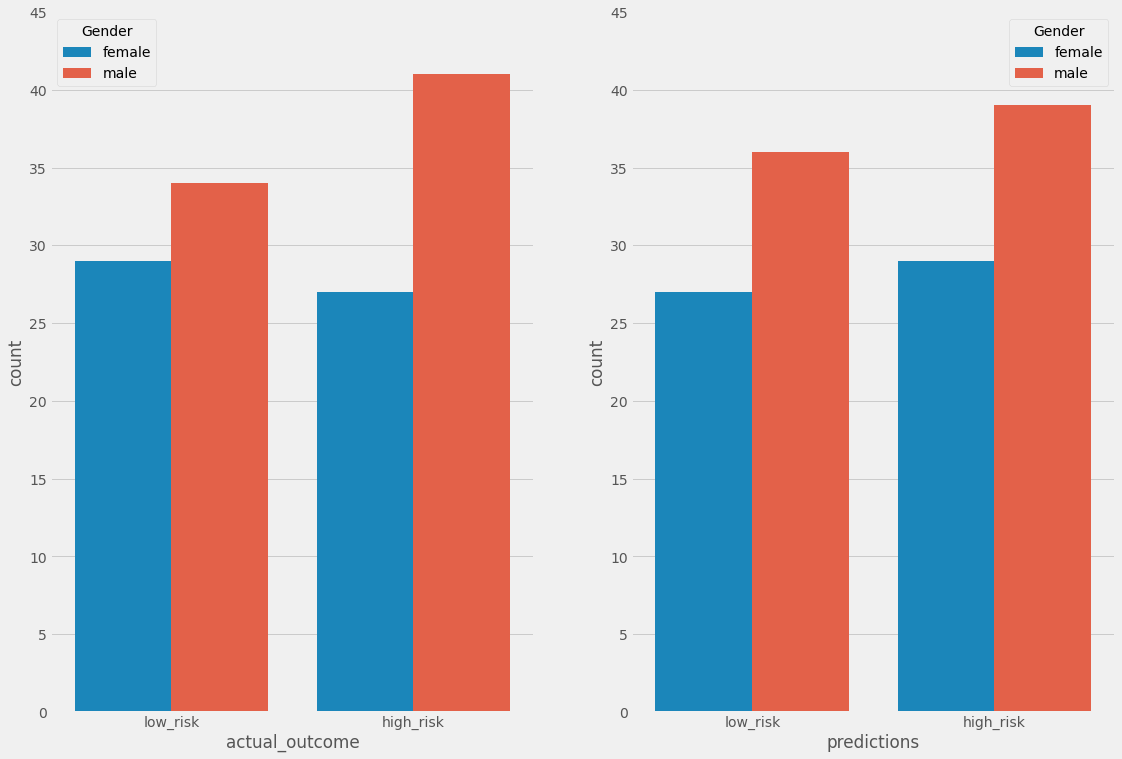

In [352]:
plt.style.use('fivethirtyeight')
custom_ylim = (0, 45)

# Setting the values for all axes.
plt.setp(ax, ylim=custom_ylim)

fig, ax =plt.subplots(1,2, figsize = (17,12))
plt.setp(ax, ylim=custom_ylim)

sns.countplot(data = combined, x = 'actual_outcome', hue='Gender', ax=ax[0])
sns.countplot(data = combined, x = 'predictions', hue='Gender', ax=ax[1])

fig.show()

In [470]:
pd.melt(frame=combined, id_vars='Patnr', value_vars=['actual_outcome', 'predictions'])

,Patnr,variable,value
0,25200283,actual_outcome,0
1,25200730,actual_outcome,1
2,25201939,actual_outcome,0
3,25201986,actual_outcome,0
4,25202235,actual_outcome,0
...,...,...,...
257,25296604,predictions,1
258,25297345,predictions,1
259,25297780,predictions,0
260,25299138,predictions,1


## Date of birth

I do not think there is a good way to visualize this. But it is expected that the patients who are predicted to be alive are on average born later (as can be seen at the mean).

In [339]:
combined.groupby('predictions')['Birthdate'].describe()

,count,mean,std,min,25%,50%,75%,max
predictions,,,,,,,,
high_risk,68.0,1933.852941,11.857694,1908.0,1926.0,1931.0,1940.5,1966.0
low_risk,63.0,1943.206349,10.609124,1928.0,1935.0,1941.0,1949.5,1979.0


In [340]:
# create 2 dataframes according to outcome

dead = combined[combined['predictions'] == 'predicted_high_risk']
alive = combined[combined['predictions'] == 'predicted_low_risk']

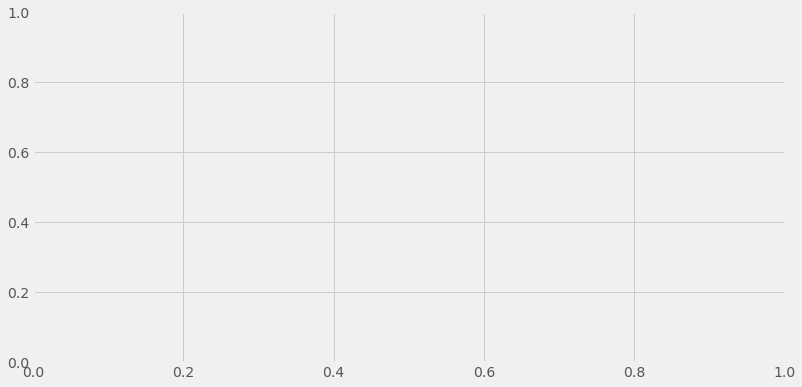

In [341]:
ax = plt.figure(figsize = (12,6))

sns.kdeplot(dead['Birthdate'], color = 'purple', label='high_risk')
sns.kdeplot(alive['Birthdate'], color = 'gold', label='low_risk')

## Wordclouds for outcomes

In [29]:
dead_ = dead['full'].dropna().tolist()
dead_[:5]

['   ',
 ' mail naar kooman med hypertensi vlg control mnd nebivolol naar ddmg gewicht  kg hartritm  min irregulair algemeen niet ziek cvd normaal pulmon normaal ademgerui extremiteiten geen oedeem voor dialys rr altijd hoog zakt tijden en na dialys thui  syst ',
 ' palpitati op telemetri episod atriumfibrillern snell volgrespon chronisch resp insufficinti waarvoor o thui bij emfyseem en ild nu onveranderd beeld thx en echocdariografi anamnestisch geen toenam dyspneu verhoogd troponin secundair bij chronisch respiratoir insufficinti beleid flecanid mg cr bisoprolol mg poliafspraak staat voor eind maart bloeddruk recht   mmhg hartritm  min t sat  l o algemeen matig ziek cvd normaal extremiteiten geen oedeem long diffuus verminderd vag de longen ',
 ' conclusi  jarig dame de vg een voorwandinfarct bekend ht en gordelroo presenteert zich  progressiev dyspno klachten sind nieuwjaar beginnend een heftig griep nu klinisch en echo grafisch overvuld bij bij longemboli minder waarschijnlijk lag

(-0.5, 1599.5, 799.5, -0.5)

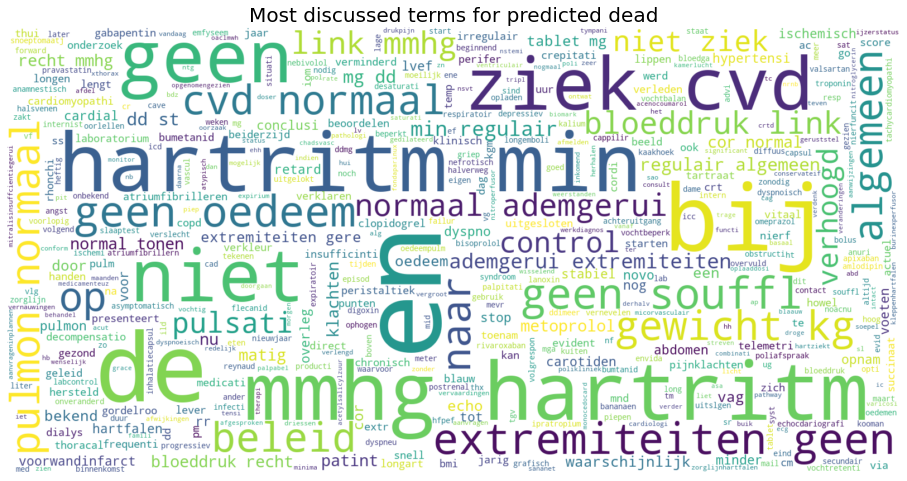

In [30]:
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=1000, max_font_size= 200,  width=1600, height=800)
wc.generate(" ".join(dead_))
plt.title("Most discussed terms for predicted dead", fontsize=20)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), alpha=0.98, interpolation="bilinear", )
plt.axis('off')

In [31]:
alive_ = alive['full'].dropna().tolist()
alive_[:5]

[' patint bekend ischemisch hartlijden lvef  toenam dyspno klachten momenteel cardiaal niet verklaarbaar geen tekenen hartfalen verder onderzoek vo max tekort gefietst geen conclusi verband aanhoudend klachten wordt een hartcatherisati aangevraagd hierna control zorglijn hartfalen  ',
 ' bekend ischemisch cardiomyopathi licht verminderd lvef crtd nierfuncti go stabiel gewicht  kg bloeddruk link   mmhg hartritm  min regulair algemeen gezond cvd niet te beoordelen pulmon normaal ademgerui extremiteiten geen oedeem ',
 ' stoppen hct bloeddruk control labcontrol  weken bij evt herstel nierfuncti start inspra control mnd gewicht  kg bloeddruk link   mmhg hartritm  min irregulair algemeen matig ziek cvd halsvenen tot mid kaakhoek pulmon normaal ademgerui extremiteiten geen oedeem ',
 ' conclusi tekenen li dc klachten dyspno nyha iiiii bij globaal verminderd lvfuncti gedilateerd bij jarig man zonder medicati geen duidelijk apklachten redelijk xecg zonder ap wel dyspno enkel ves beleid iom pat

(-0.5, 1599.5, 799.5, -0.5)

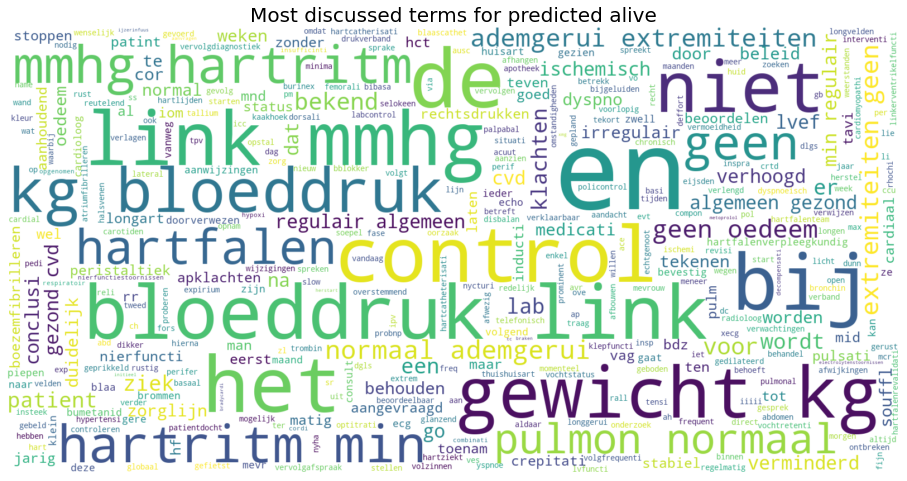

In [32]:
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=1000, max_font_size= 200,  width=1600, height=800)
wc.generate(" ".join(alive_))
plt.title("Most discussed terms for predicted alive", fontsize=20)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), alpha=0.98, interpolation="bilinear", )
plt.axis('off')

# Distribution of documents in each class 

In [33]:
dead['Patnr']

55     25228370
115    25252187
105    25227121
95     25223588
27     25220094
97     25223588
36     25221253
80     25224634
93     25224634
18     25226375
10     25226312
11     25226312
127    25255920
45     25228370
70     25224243
Name: Patnr, dtype: int64

In [34]:
combined[combined['Patnr'] == 25223588]

,Patnr,dead,full
38,25223588,0,conclusi jarig dame de vg een voorwandinfarc...
